### Assignment-7-2_Decision_Tree


In [ ]:
Use decision trees to prepare a model on fraud data 
Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



### Import Libraries

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report


### Import Data

In [102]:
fdata=pd.read_csv('Fraud_check.csv')
fdata.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [103]:
fdata['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [104]:
fdata.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

#### No missing value found

In [105]:
len(fdata)

600

### Data Preprocessing

In [106]:
# Treating those who have Taxable.Income <= 30000 as "Risky" and others are "Good"
fdata_=fdata.copy()
fdata_['Taxable.Income']=fdata_['Taxable.Income'].map(lambda x:'Risky' if x <= 30000 else 'Good')
fdata_.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


#### Normalisation of continous variables

In [108]:
from sklearn import preprocessing
# Use min-max scaling
scaler = preprocessing.MinMaxScaler()

fdata_['City.Population']=scaler.fit_transform(fdata[['City.Population']])
fdata_['Work.Experience']=scaler.fit_transform(fdata[['Work.Experience']])
fdata_.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,0.139472,0.333333,YES
1,YES,Divorced,Good,0.622394,0.600000,YES
2,NO,Married,Good,0.772568,1.000000,YES
3,YES,Single,Good,0.962563,0.500000,YES
4,NO,Married,Good,0.010081,0.933333,NO


#### Introduce dummy variables

In [109]:
fdata_dummy=pd.get_dummies(fdata_[['Undergrad','Marital.Status','Urban']],drop_first=True)
fdata_dummy.head()

,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0,0,1,1
1,1,0,0,1
2,0,1,0,1
3,1,0,1,1
4,0,1,0,0


In [116]:
# Drop the original colums and replace by dummy variables
#fdata_=fdata_.drop(['Undergrad','Marital.Status','Urban'],axis=1)
fdata_=pd.concat([fdata_,fdata_dummy],axis=1)

In [117]:
fdata_.tail()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
595,Good,0.078811,0.233333,1,0,0,1
596,Good,0.170058,0.066667,1,0,0,1
597,Good,0.737240,0.000000,0,0,0,1
598,Good,0.886810,0.566667,1,1,0,0
599,Good,0.760683,0.533333,0,0,0,0


### Graphical Analysis
#### Let's see distibution our data against Taxable income

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


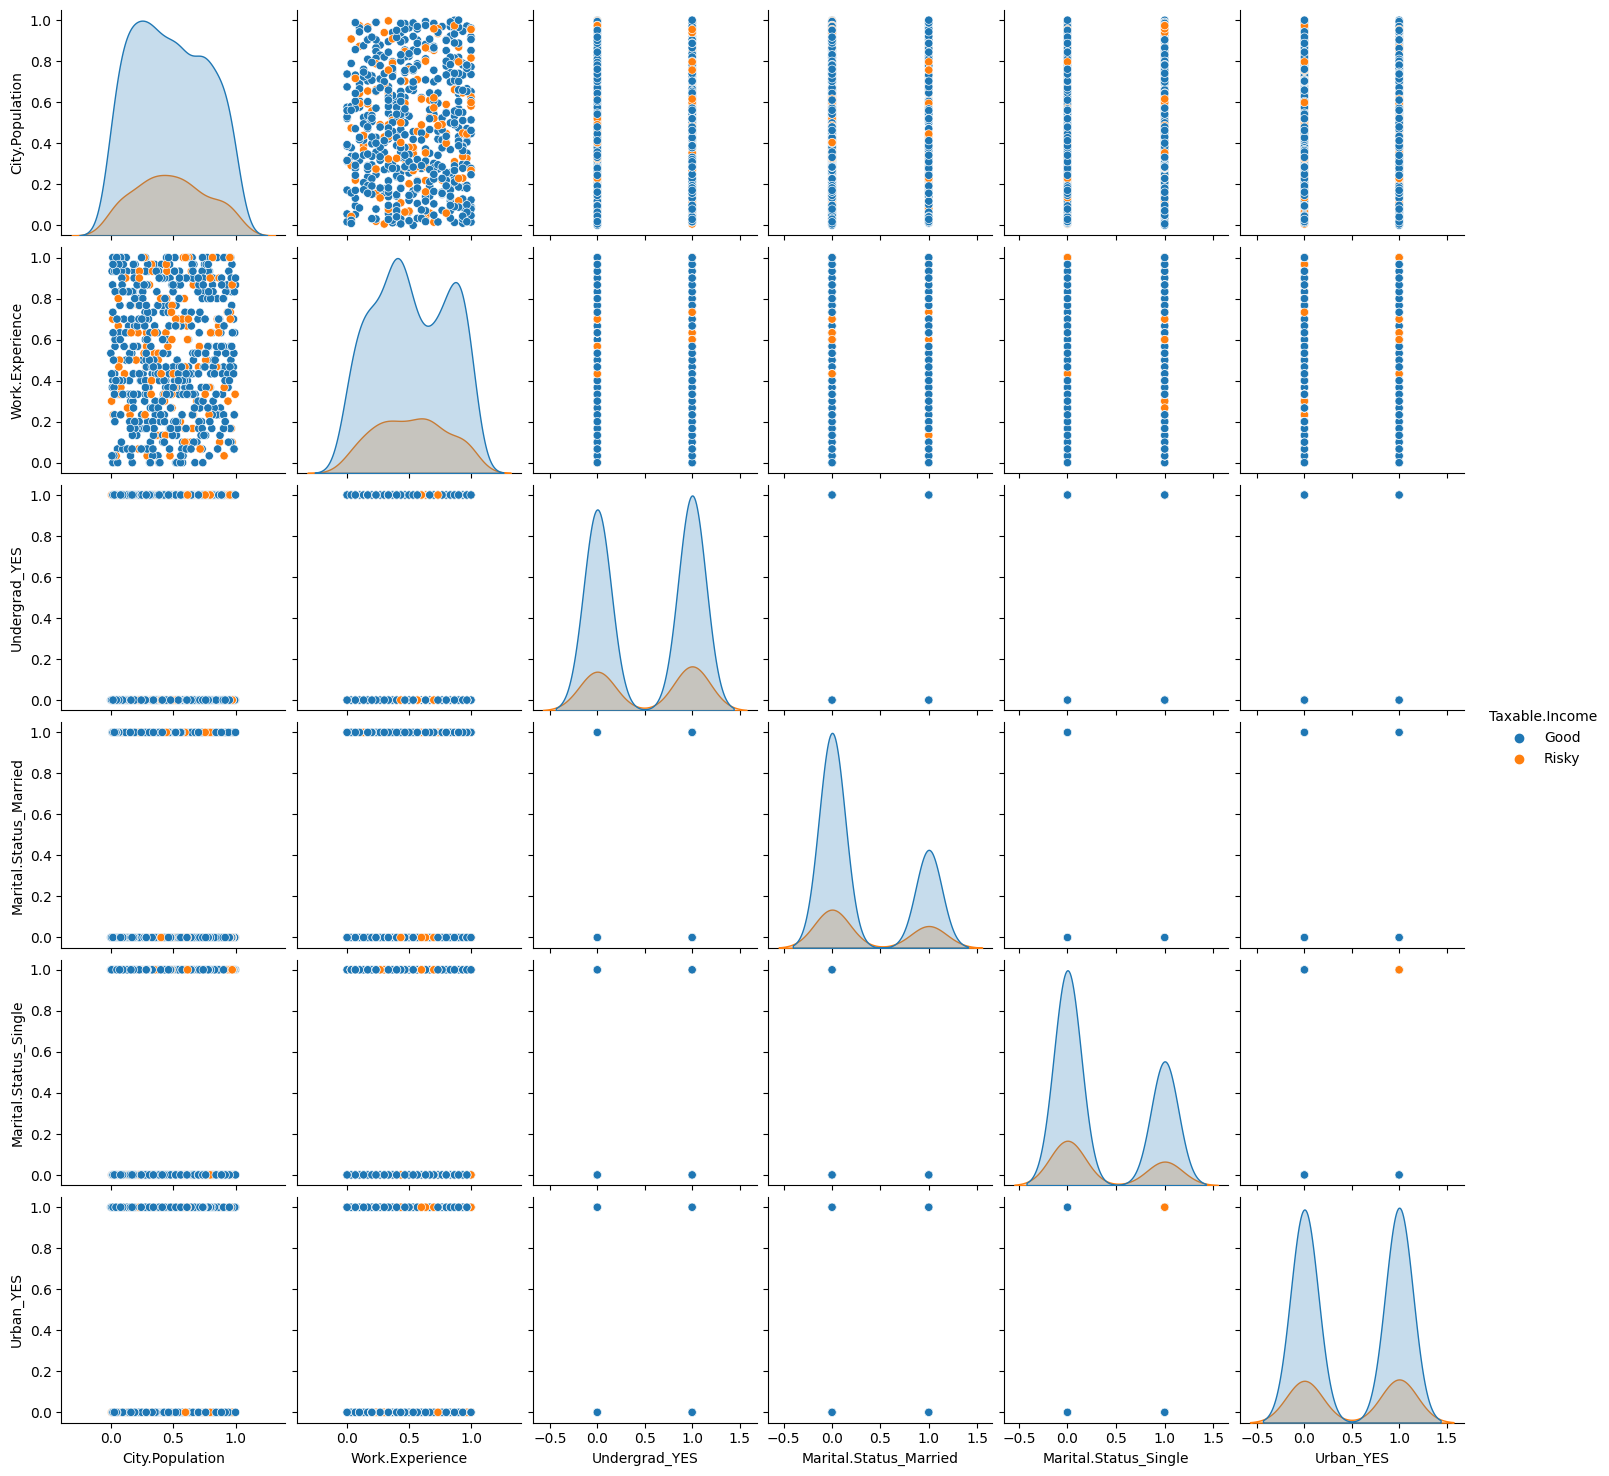

In [120]:
sns.pairplot(data=fdata_,hue='Taxable.Income')

<Axes: xlabel='Undergrad', ylabel='count'>

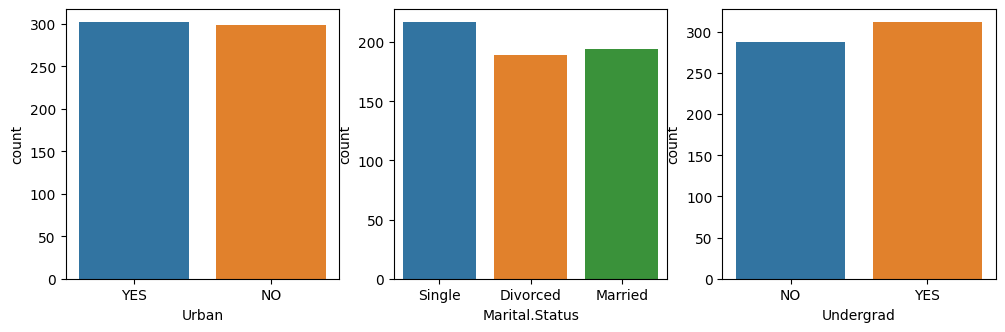

In [121]:
fig ,ax=plt.subplots(figsize=(12,3.5),ncols=3)
sns.countplot(x='Urban',data=fdata,ax=ax[0])
sns.countplot(x='Marital.Status',data=fdata,ax=ax[1])
sns.countplot(x='Undergrad',data=fdata,ax=ax[2])

<Axes: >

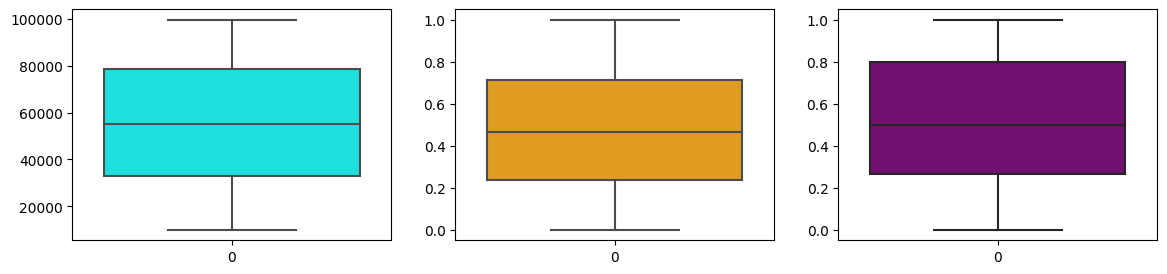

In [122]:
fig, ax1=plt.subplots(figsize=(14,3),ncols=3)
sns.boxplot(fdata['Taxable.Income'],ax=ax1[0],color='cyan')
sns.boxplot(fdata['City.Population'],ax=ax1[1],color='orange')
sns.boxplot(fdata['Work.Experience'],ax=ax1[2],color='purple')

#### The data given looks fine. Lets do some data preprocessing on variables. There is no outliers present in continous variables

In [123]:
fdata_.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,Good,0.139472,0.333333,0,0,1,1
1,Good,0.622394,0.600000,1,0,0,1
2,Good,0.772568,1.000000,0,1,0,1
3,Good,0.962563,0.500000,1,0,1,1
4,Good,0.010081,0.933333,0,1,0,0


In [124]:
X=fdata_.iloc[:,1:]
y=fdata_.iloc[:,0]
y.value_counts()
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

<Axes: xlabel='Taxable.Income', ylabel='count'>

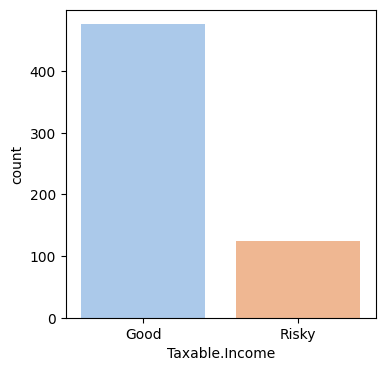

In [125]:
plt.subplots(figsize=(4,4))
sns.countplot(x='Taxable.Income',data=fdata_,palette='pastel')

### Decision Tree Modelling

#### 1. Entropy as a criterion

In [126]:
X_train ,X_test,y_train,y_test =train_test_split(X,y,test_size=.4,random_state=10)

In [127]:
tmodel=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [128]:
tmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [129]:
X.columns.tolist()

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES']

In [154]:
#tree.plot_tree(tmodel);

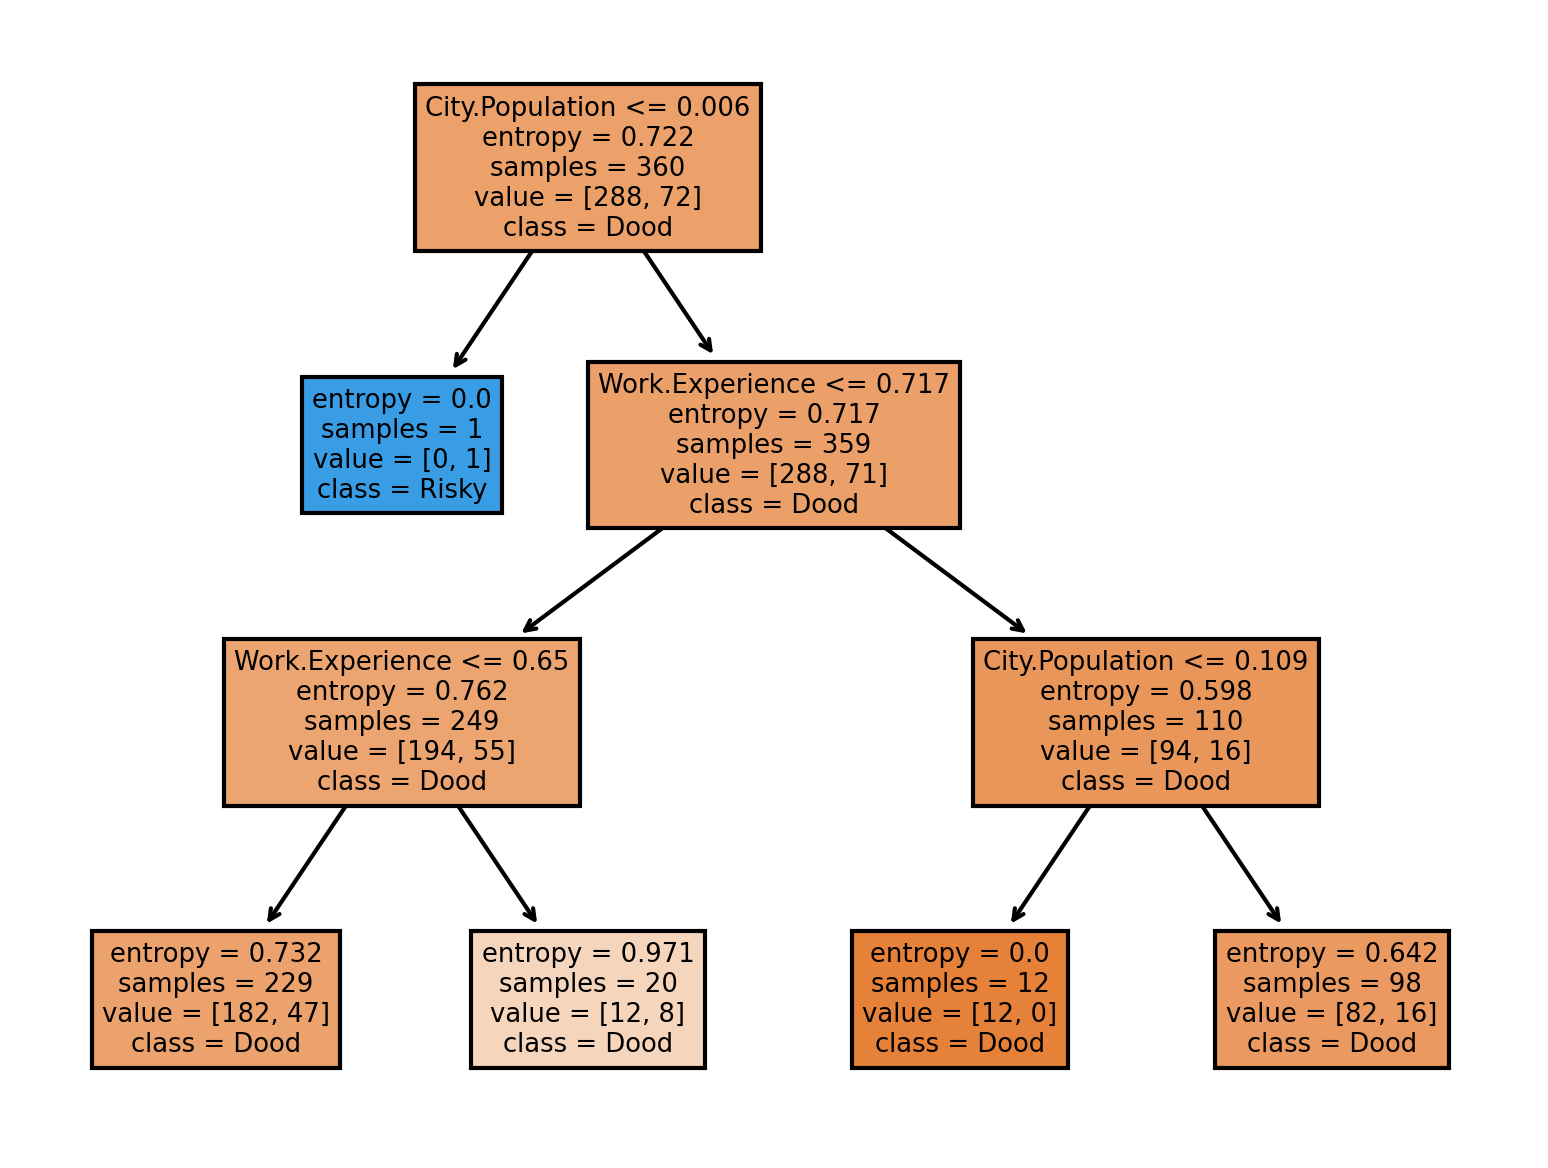

In [135]:

fn= ['City.Population', 'Work.Experience', 'Undergrad_YES', 'Marital.Status_Married', 'Marital.Status_Single', 'Urban_YES']
cn=['Dood','Risky']
plt.subplots(dpi=300)
tree.plot_tree(tmodel,feature_names = fn, class_names=cn,filled=True,);

### Prediction an Model evaluation

In [136]:
y_pred=tmodel.predict(X_test)

In [137]:
y_test1=np.array(y_test)
y_pred1=np.array(y_pred)
y_test1=y_test1.ravel()

In [138]:
pd.crosstab(y_test1,y_pred1)

col_0,Good,Risky
row_0,,
Good,187,1
Risky,52,0


In [139]:
y_pred1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [140]:
tmodel.score(X_test,y_test)

0.7791666666666667

In [141]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

        Good       0.78      0.99      0.88       188
       Risky       0.00      0.00      0.00        52

    accuracy                           0.78       240
   macro avg       0.39      0.50      0.44       240
weighted avg       0.61      0.78      0.69       240



#### Even if we are getting good precision and recall values for majority class  it is zero for minority class. That means that our model is not all effective. So let's do resampling using SMOTE

### SMOTE

In [142]:
from imblearn.over_sampling import SMOTE
#Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [143]:
y_smote.value_counts()

Good     476
Risky    476
Name: Taxable.Income, dtype: int64

In [146]:
tmodel1=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [147]:
X1_train,X1_test,y1_train,y1_test =train_test_split(X_smote,y_smote,test_size=.35,random_state=20)

In [266]:
tmodel1.fit(X1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

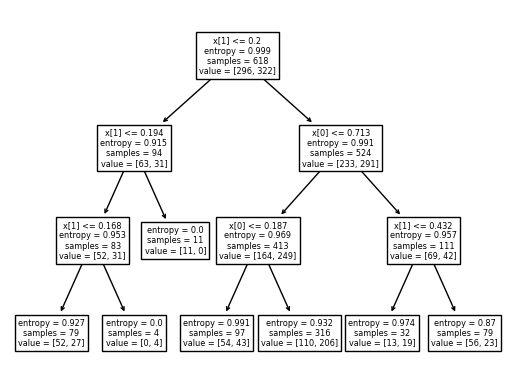

In [149]:
tree.plot_tree(tmodel1);

In [150]:
y1_pred=tmodel1.predict(X1_test)
y1_test=np.array(y_test)
y1_pred=np.array(y_pred)
y1_test=y_test1.ravel()

In [151]:
pd.crosstab(y1_test,y1_pred)

col_0,Good,Risky
row_0,,
Good,187,1
Risky,52,0


In [152]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

        Good       0.78      0.99      0.88       188
       Risky       0.00      0.00      0.00        52

    accuracy                           0.78       240
   macro avg       0.39      0.50      0.44       240
weighted avg       0.61      0.78      0.69       240



#### We dnt find any improvement after resampling using SMOTE.. Lets do some feature engineering

### Feature Engineering

#### Lets introduce a new variable 'New' which is the product of standardized values of 'Taxable.Income' & 'Work.Experience'

In [153]:
fnew=fdata.copy()
fnew.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,0.139472,0.333333,YES
1,YES,Divorced,33700,0.622394,0.600000,YES
2,NO,Married,36925,0.772568,1.000000,YES
3,YES,Single,50190,0.962563,0.500000,YES
4,NO,Married,81002,0.010081,0.933333,NO


In [155]:
# Scale Taxable.Income
from sklearn import preprocessing
# Use min-max scaling
scaler = preprocessing.MinMaxScaler()

fnew['Taxable.Income']=scaler.fit_transform(fdata[['Taxable.Income']])
fnew.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0.656468,0.139472,0.333333,YES
1,YES,Divorced,0.264428,0.622394,0.600000,YES
2,NO,Married,0.300415,0.772568,1.000000,YES
3,YES,Single,0.448436,0.962563,0.500000,YES
4,NO,Married,0.792258,0.010081,0.933333,NO


In [157]:
# Introduce new feature variable new=Taxable.Income * Work.Experience
fnew['New']=fnew['Taxable.Income']*fnew['Work.Experience']
fnew.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,New
0,NO,Single,0.656468,0.139472,0.333333,YES,0.218823
1,YES,Divorced,0.264428,0.622394,0.600000,YES,0.158657
2,NO,Married,0.300415,0.772568,1.000000,YES,0.300415
3,YES,Single,0.448436,0.962563,0.500000,YES,0.224218
4,NO,Married,0.792258,0.010081,0.933333,NO,0.739441


In [164]:
#Convert taxable Income(Target) into Categories 'Good' & 'Risky'
fnew['Taxable.Income']=fdata['Taxable.Income'].map(lambda x:'Risky' if x <= 30000 else 'Good')
fnew.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,New
0,NO,Single,Good,0.139472,0.333333,YES,0.218823
1,YES,Divorced,Good,0.622394,0.600000,YES,0.158657
2,NO,Married,Good,0.772568,1.000000,YES,0.300415
3,YES,Single,Good,0.962563,0.500000,YES,0.224218
4,NO,Married,Good,0.010081,0.933333,NO,0.739441


In [167]:
# Introduce dummy variables for Category variables
fnew_dummy=pd.get_dummies(fnew[['Undergrad','Marital.Status','Urban']],drop_first=True)
fnew_dummy.head()

,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0,0,1,1
1,1,0,0,1
2,0,1,0,1
3,1,0,1,1
4,0,1,0,0


In [168]:
# Drop the original colums and replace by dummy variables
fnew=fnew.drop(['Undergrad','Marital.Status','Urban'],axis=1)
fnew=pd.concat([fnew,fdata_dummy],axis=1)
fnew.head()

,Taxable.Income,City.Population,Work.Experience,New,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,Good,0.139472,0.333333,0.218823,0,0,1,1
1,Good,0.622394,0.600000,0.158657,1,0,0,1
2,Good,0.772568,1.000000,0.300415,0,1,0,1
3,Good,0.962563,0.500000,0.224218,1,0,1,1
4,Good,0.010081,0.933333,0.739441,0,1,0,0


In [367]:
# Define target and feature variable
Xnew=fnew.iloc[:,1:]
ynew=fnew.iloc[:,0]
%store Xnew
%store ynew

Stored 'Xnew' (DataFrame)
Stored 'ynew' (Series)


In [274]:
#Train Test Split
Xnew_train,Xnew_test,ynew_train,ynew_test =train_test_split(Xnew,ynew,test_size=.25,random_state=20)

### New Model

#### Entropy as criterion

In [323]:
tmodel1=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [324]:
tmodelnew.fit(Xnew_train,ynew_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [325]:
# predicton
ynew_pred=tmodelnew.predict(Xnew_test)
ynew_test=np.array(ynew_test)
ynew_pred=np.array(ynew_pred)
ynew_test=ynew_test.ravel()

In [326]:
pd.crosstab(ynew_test,ynew_pred)

col_0,Good,Risky
row_0,,
Good,114,3
Risky,10,23


In [327]:
print(classification_report(ynew_test,ynew_pred))

              precision    recall  f1-score   support

        Good       0.92      0.97      0.95       117
       Risky       0.88      0.70      0.78        33

    accuracy                           0.91       150
   macro avg       0.90      0.84      0.86       150
weighted avg       0.91      0.91      0.91       150



#### Gini Impurity  as criterion

In [328]:
# gini impurity as criterion

tmodelgini=DecisionTreeClassifier(criterion='gini',max_depth=3)
tmodelgini.fit(Xnew_train,ynew_train)
ynew_pred=tmodelnew.predict(Xnew_test)
ynew_test=np.array(ynew_test)
ynew_pred=np.array(ynew_pred)
ynew_test=ynew_test.ravel()

In [329]:
pd.crosstab(ynew_test,ynew_pred)

col_0,Good,Risky
row_0,,
Good,114,3
Risky,10,23


In [330]:
print(classification_report(ynew_test,ynew_pred))

              precision    recall  f1-score   support

        Good       0.92      0.97      0.95       117
       Risky       0.88      0.70      0.78        33

    accuracy                           0.91       150
   macro avg       0.90      0.84      0.86       150
weighted avg       0.91      0.91      0.91       150



In [354]:
label_encoder = preprocessing.LabelEncoder()
yt1=label_encoder.fit_transform(ynew_test)
yp1=label_encoder.fit_transform(ynew_pred)

Text(0, 0.5, 'True Positive Rate')

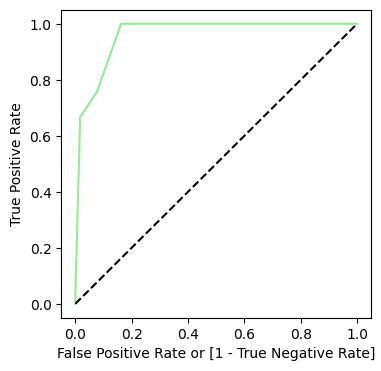

In [365]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(yt1,tmodelsmote.predict_proba(Xnew_test)[:,1])
auc1 = roc_auc_score(yp1, yt1)
plt.subplots(figsize=(4,4))
plt.plot(fpr, tpr, color='lightgreen')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [359]:
# Area under curve
auc1

0.901985111662531

#### We have obtained a satisfactory model with both gini impurity & entropy as criterion with a max_depth of 3. But still lets try with SMOTE and see whether we can improve our monority class perfornance

### SMOTE

In [345]:
from imblearn.over_sampling import SMOTE
#Apply SMOTE
smote = SMOTE()
Xsmote, ysmote = smote.fit_resample(Xnew, ynew)

In [332]:
Xsmote_train,Xsmote_test,ysmote_train,ysmote_test =train_test_split(Xsmote,ysmote,test_size=.25,random_state=20)

In [333]:
#tmodelgini=DecisionTreeClassifier(criterion='gini',max_depth=3)
tmodelsmote=DecisionTreeClassifier(criterion='gini',max_depth=3)

tmodelsmote.fit(Xsmote_train,ysmote_train)

DecisionTreeClassifier(max_depth=3)

In [334]:
ysmote_pred=tmodelsmote.predict(Xsmote_test)
ysmote_test=np.array(ysmote_test)
ysmote_pred=np.array(ysmote_pred)
ysmote_test=ysmote_test.ravel()

In [361]:
pd.crosstab(ysmote_test,ysmote_pred)

col_0,Good,Risky
row_0,,
Good,113,17
Risky,0,108


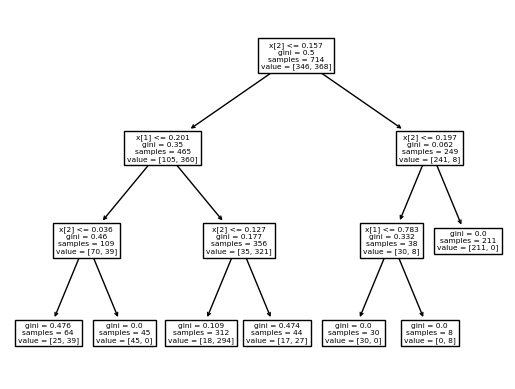

In [338]:
tree.plot_tree(tmodelsmote);

In [322]:
# Classification Report
print(classification_report(ysmote_test,ysmote_pred))

              precision    recall  f1-score   support

        Good       1.00      0.86      0.93       130
       Risky       0.86      1.00      0.92       108

    accuracy                           0.92       238
   macro avg       0.93      0.93      0.92       238
weighted avg       0.94      0.92      0.92       238



#### We have improved our model by using SMOTE .Minority class performance has tremendously increased.Lets finalise our model and plot ROC curve

In [348]:
label_encoder = preprocessing.LabelEncoder()
yt=label_encoder.fit_transform(ysmote_test)
yp=label_encoder.fit_transform(ysmote_pred)

Text(0, 0.5, 'True Positive Rate')

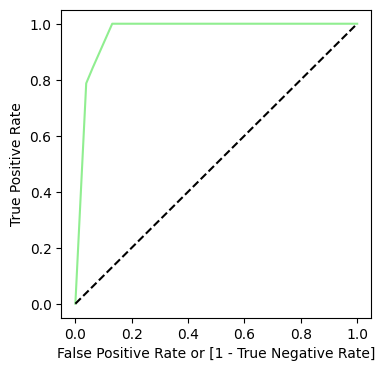

In [366]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(yt,tmodelsmote.predict_proba(Xsmote_test)[:,1])
auc = roc_auc_score(yp, yt)
plt.subplots(figsize=(4,4))
plt.plot(fpr, tpr, color='lightgreen')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [350]:
# Area under the curve
auc

0.9319999999999999

#### Conclusion: Sucessfully implemented 3 Decision Tree Classifier models with entropy as criterion/gini as criterion and model with SMOTE.. All are providing satisfactory performance